In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import matplotlib.patches as  mpatches
from matplotlib.lines import Line2D
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

/opt/homebrew/Caskroom/miniconda/base/envs/subhalos/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
plt.style.use('../paper/paper.mplstyle')
double_textwidth = 7.0 #inches
single_textwidth = 3.5 #inches

In [3]:
fixed = [False, True, False, False, True, False]

fid_values = [2.0, 0.2]

fiducial = jsm_mcmc.Chain("../../mcmc/simple_power_law/s15/alpha_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

mock55 = jsm_mcmc.Chain("../../mcmc/fiducial/survey/mock_55/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

mock75 = jsm_mcmc.Chain("../../../data/big_files/mock_75/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

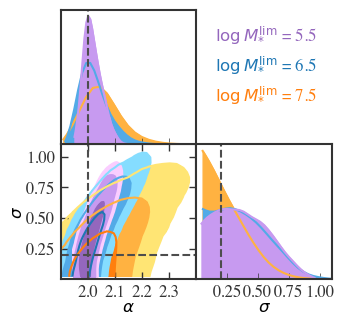

In [4]:
chain_labels = ["$\log M_{*}^{\mathrm{lim}}$ = 5.5",
                "$\log M_{*}^{\mathrm{lim}}$ = 6.5",
                "$\log M_{*}^{\mathrm{lim}}$ = 7.5"]


data = [mock55.clean, fiducial.clean, mock75.clean]
test = jsm_mcmc.MulitChain(data, chain_labels, fixed)
test.plot_posteriors(paper=True, filledPlots=True, nContourLevels=3, smoothingKernel=1.5, truths=fid_values, colorsOrder=["purples", "blues", "oranges"], paramRanges=[[1.9, 2.4], [0,1.1]])#, plotName="../../../paper_1/figures/feature_recovery/mag_limit.pdf")

In [5]:
mock300 = jsm_mcmc.Chain("../../mcmc/fiducial/survey/mock_300/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

mock500 = jsm_mcmc.Chain("../../mcmc/fiducial/survey/mock_500/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

mock1000 = jsm_mcmc.Chain("../../../data/big_files/mock_1000/chain.h5", fixed=fixed, Nstack=500, Nburn=1000, Nthin=15)

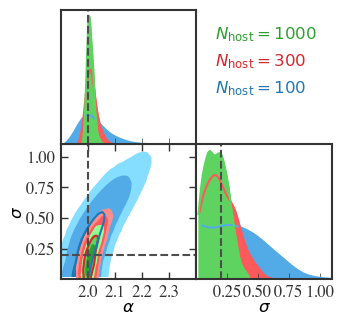

In [6]:
chain_labels = ["$N_{\mathrm{host}} = 1000$",
                "$N_{\mathrm{host}} = 300$",
                "$N_{\mathrm{host}} = 100$"]


data = [mock1000.clean, mock300.clean, fiducial.clean]
test = jsm_mcmc.MulitChain(data, chain_labels, fixed)
test.plot_posteriors(paper=True, filledPlots=True, nContourLevels=3, smoothingKernel=1.5, truths=fid_values, colorsOrder=["greens", "reds", "blues"], paramRanges=[[1.9, 2.4], [0,1.1]])#, plotName="../../../paper_1/figures/feature_recovery/Nhost.pdf")        

In [7]:
# from astropy.table import QTable

# min_mass = [5.5, 6.5, 7.5, 6.5, 6.5]

# Nhost = [100, 100, 100, 300, 10000]

# in_alphas = ["2.0"] * 5
# in_sigmas = ["0.2"] * 5

# out_alphas = [mock55.constraints[0], fiducial.constraints[0], mock75.constraints[0], mock300.constraints[0], mock1000.constraints[0]]
# out_sigmas = [mock55.constraints[1], fiducial.constraints[1], mock75.constraints[1], mock300.constraints[1], mock1000.constraints[1]]

# tab = QTable([min_mass, Nhost, in_alphas, in_sigmas, out_alphas, out_sigmas])
# tab.write(filename="../../../paper_1/test.txt", format="latex", overwrite=True)

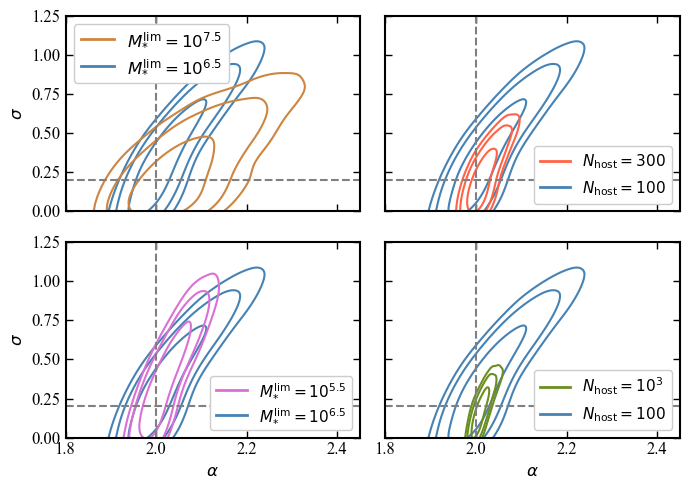

In [41]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(double_textwidth, 5))

sns.kdeplot(x=fiducial.clean[:, 0], y=fiducial.clean[:, 1], ax=axes[0, 0], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="steelblue")
sns.kdeplot(x=mock75.clean[:, 0], y=mock75.clean[:, 1], ax=axes[0, 0], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="peru")
axes[0,0].legend(handles=[Line2D([], [], color='peru', lw = 2), Line2D([], [], color='steelblue', lw = 2)], labels=["$M_{*}^{\mathrm{lim}}=10^{7.5}$", "$M_{*}^{\mathrm{lim}}=10^{6.5}$"], loc=2, framealpha=1)

sns.kdeplot(x=fiducial.clean[:, 0], y=fiducial.clean[:, 1], ax=axes[0, 1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="steelblue")
sns.kdeplot(x=mock300.clean[:, 0], y=mock300.clean[:, 1], ax=axes[0, 1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="tomato")
axes[0,1].legend(handles=[Line2D([], [], color='tomato', lw = 2), Line2D([], [], color='steelblue', lw = 2)], labels=["$N_{\mathrm{host}}=300$", "$N_{\mathrm{host}}=100$"], fontsize=11, loc=4, framealpha=1)

sns.kdeplot(x=fiducial.clean[:, 0], y=fiducial.clean[:, 1], ax=axes[1, 0], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="steelblue")
sns.kdeplot(x=mock55.clean[:, 0], y=mock55.clean[:, 1], ax=axes[1, 0], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="orchid")
axes[1,0].legend(handles=[Line2D([], [], color='orchid', lw = 2), Line2D([], [], color='steelblue', lw = 2)], labels=["$M_{*}^{\mathrm{lim}}=10^{5.5}$", "$M_{*}^{\mathrm{lim}}=10^{6.5}$"], fontsize=11, loc=4, framealpha=1)

sns.kdeplot(x=fiducial.clean[:, 0], y=fiducial.clean[:, 1], ax=axes[1, 1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="steelblue")
sns.kdeplot(x=mock1000.clean[:, 0], y=mock1000.clean[:, 1], ax=axes[1, 1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=3, color="olivedrab")
axes[1,1].legend(handles=[Line2D([], [], color='olivedrab', lw = 2), Line2D([], [], color='steelblue', lw = 2)], labels=["$N_{\mathrm{host}}=10^3$", "$N_{\mathrm{host}}=100$"], fontsize=11, loc=4, framealpha=1)

# myHandle = [Line2D([], [], color='peru', lw = 2), Line2D([], [], color='darkorange', lw = 2), Line2D([], [], color='crimson', lw = 2),  Line2D([], [], color='darkviolet', lw = 2), Line2D([], [], color='steelblue', lw = 2)]
# # fig.legend(handles = myHandle, labels=["$\log M_{*}^{\mathrm{lim}}=7.5$", "$\log M_{*}^{\mathrm{lim}}=5.5$", "$N_{\mathrm{host}}=300$", "$N_{\mathrm{host}}=1000$", "Fiducial Model"], ncols=3, loc="upper center", bbox_to_anchor=(0.5, 1.2), framealpha=1)

for ax in axes.flatten():
    ax.axhline(0.2, ls="--", color="grey")
    ax.axvline(2.0, ls="--", color="grey")
    ax.set_xlabel("$\\alpha$")
    ax.set_ylabel("$\sigma$")
    ax.set_xlim(1.8, 2.45)
    ax.set_ylim(0, 1.25)

plt.tight_layout()
#plt.savefig("../../../paper_1/figures/aux/survey_update.pdf", bbox_inches="tight")
plt.show()

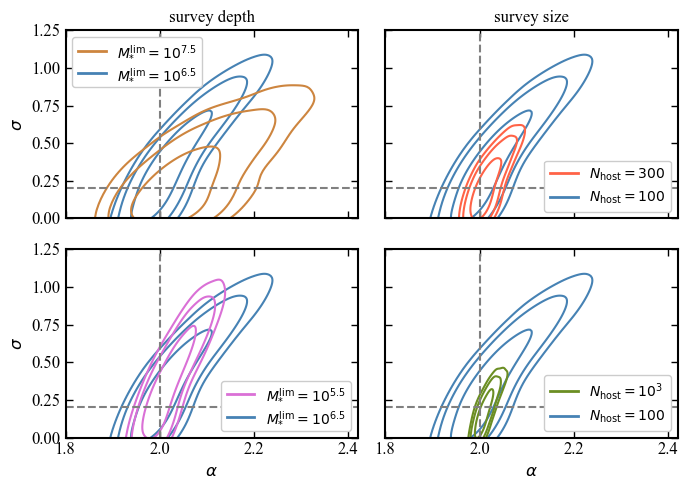

In [51]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(double_textwidth, 5))

sns.kdeplot(x=fiducial.clean[:, 0], y=fiducial.clean[:, 1], ax=axes[0, 0], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="steelblue")
sns.kdeplot(x=mock75.clean[:, 0], y=mock75.clean[:, 1], ax=axes[0, 0], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="peru")
axes[0,0].legend(handles=[Line2D([], [], color='peru', lw = 2), Line2D([], [], color='steelblue', lw = 2)], labels=["$M_{*}^{\mathrm{lim}}=10^{7.5}$", "$M_{*}^{\mathrm{lim}}=10^{6.5}$"], fontsize=10, loc=2, framealpha=1)
axes[0,0].set_title("survey depth")

sns.kdeplot(x=fiducial.clean[:, 0], y=fiducial.clean[:, 1], ax=axes[0, 1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="steelblue")
sns.kdeplot(x=mock300.clean[:, 0], y=mock300.clean[:, 1], ax=axes[0, 1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="tomato")
axes[0,1].legend(handles=[Line2D([], [], color='tomato', lw = 2), Line2D([], [], color='steelblue', lw = 2)], labels=["$N_{\mathrm{host}}=300$", "$N_{\mathrm{host}}=100$"], fontsize=10, loc=4, framealpha=1)
axes[0,1].set_title("survey size")

sns.kdeplot(x=fiducial.clean[:, 0], y=fiducial.clean[:, 1], ax=axes[1, 0], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="steelblue")
sns.kdeplot(x=mock55.clean[:, 0], y=mock55.clean[:, 1], ax=axes[1, 0], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="orchid")
axes[1,0].legend(handles=[Line2D([], [], color='orchid', lw = 2), Line2D([], [], color='steelblue', lw = 2)], labels=["$M_{*}^{\mathrm{lim}}=10^{5.5}$", "$M_{*}^{\mathrm{lim}}=10^{6.5}$"], fontsize=10, loc=4, framealpha=1)

sns.kdeplot(x=fiducial.clean[:, 0], y=fiducial.clean[:, 1], ax=axes[1, 1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="steelblue")
sns.kdeplot(x=mock1000.clean[:, 0], y=mock1000.clean[:, 1], ax=axes[1, 1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=3, color="olivedrab")
axes[1,1].legend(handles=[Line2D([], [], color='olivedrab', lw = 2), Line2D([], [], color='steelblue', lw = 2)], labels=["$N_{\mathrm{host}}=10^3$", "$N_{\mathrm{host}}=100$"], fontsize=10, loc=4, framealpha=1)

for ax in axes.flatten():
    ax.axhline(0.2, ls="--", color="grey")
    ax.axvline(2.0, ls="--", color="grey")
    ax.set_xlabel("$\\alpha$")
    ax.set_ylabel("$\sigma$")
    ax.set_xlim(1.8, 2.42)
    ax.set_ylim(0, 1.25)

plt.tight_layout()
plt.savefig("../../../paper_1/figures/aux/survey_update.pdf", bbox_inches="tight")
plt.show()